In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [4]:
dados = pd.read_csv('dados/dados_projeto.csv', sep=';')
dados.head()

,Y,X
0,25461,27.30
1,28972,27.02
2,30814,24.82
3,29799,23.98
4,28900,23.82


In [6]:
dados.shape

(365, 2)

In [10]:
dados.aggregate(['mean','std','var']).round(2)

,Y,X
mean,25401.37,21.23
std,4399.14,3.18
var,19352456.52,10.11


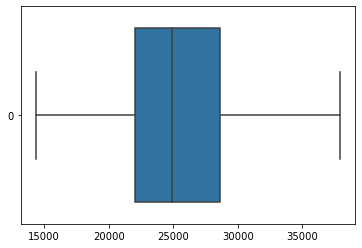

In [14]:
ax = sns.boxplot(data=dados.Y,orient='h')

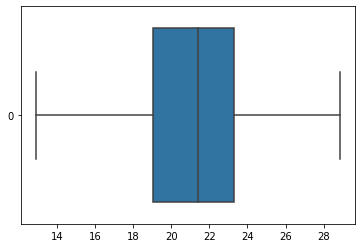

In [15]:
ax = sns.boxplot(data=dados.X,orient='h')

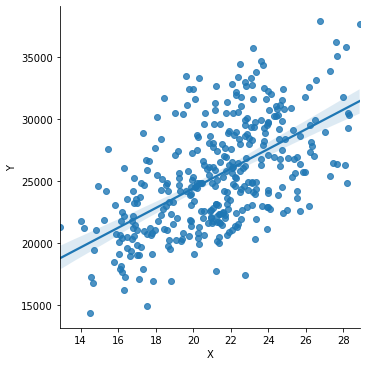

In [24]:
ax = sns.lmplot(x='X',y='Y',data=dados)

In [23]:
dados.corr()

,Y,X
Y,1.000000,0.574615
X,0.574615,1.000000


In [27]:
y = dados.Y
x = sm.add_constant(dados.X) 
resultado_regressao = sm.OLS(y,x).fit()
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     178.9
Date:                Tue, 20 Oct 2020   Prob (F-statistic):           1.87e-33
Time:                        18:21:18   Log-Likelihood:                -3506.3
No. Observations:                 365   AIC:                             7017.
Df Residuals:                     363   BIC:                             7024.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8528.9073   1275.363      6.687      0.0

In [29]:
#Y previsto
dados['Y_previsto'] = resultado_regressao.predict()

In [30]:
dados.head()

,Y,X,Y_previsto
0,25461,27.30,30229.200544
1,28972,27.02,30006.633434
2,30814,24.82,28257.891852
3,29799,23.98,27590.190521
4,28900,23.82,27463.009315


In [32]:
#Residuos
dados['Residuos'] = resultado_regressao.resid

In [33]:
dados.head()

,Y,X,Y_previsto,Residuos
0,25461,27.30,30229.200544,-4768.200544
1,28972,27.02,30006.633434,-1034.633434
2,30814,24.82,28257.891852,2556.108148
3,29799,23.98,27590.190521,2208.809479
4,28900,23.82,27463.009315,1436.990685


In [36]:
#previsao
print(f'{resultado_regressao.predict([1,42])[0].round()} Cervejas')

41914.0 Cervejas


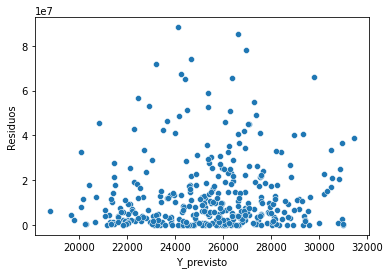

In [41]:
ax = sns.scatterplot(x=dados.Y_previsto,y=dados.Residuos**2)

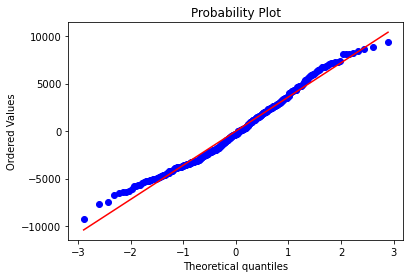

In [42]:
from scipy.stats import probplot
(_,(_,_,_)) = probplot(dados.Residuos,plot=plt)

In [43]:
#Coeficiente de determinação
sqr = dados.Y_previsto.apply(lambda y: (y-dados.Y.mean())**2).sum()
sqt = dados.Y.apply(lambda y: (y-dados.Y.mean())**2).sum() 
beta2 = sqr/sqt
beta2

0.3301820493324319